In [86]:
import os
import librosa
import numpy as np
import pandas as pd

In [97]:
for i in os.listdir("Training Set"):
    print(i)

Dina-Close (1).wav
Dina-Close (2).wav
Dina-Close (3).wav
Dina-Close (4).wav
Dina-Close (5).wav
Dina-Close (6).wav
Dina-Open (1).wav
Dina-Open (10).wav
Dina-Open (2).wav
Dina-Open (3).wav
Dina-Open (4).wav
Dina-Open (5).wav
Dina-Open (6).wav
Dina-Open (7).wav
Dina-Open (8).wav
Dina-Open (9).wav
Dina-Push (1).wav
Dina-Push (2).wav
Dina-Push (3).wav
Dina-Push (4).wav
Dina-Push (5).wav
Dina-Push (6).wav
Dina-Window (1).wav
Dina-Window (2).wav
Dina-Window (3).wav
Dina-Window (4).wav
Dina-Window (5).wav
Dina-Window (6).wav
Romaisaa-Close (1).wav
Romaisaa-Close (2).wav
Romaisaa-Close (3).wav
Romaisaa-Close (4).wav
Romaisaa-Close (5).wav
Romaisaa-Close (6).wav
Romaisaa-Open (1).wav
Romaisaa-Open (10).wav
Romaisaa-Open (2).wav
Romaisaa-Open (3).wav
Romaisaa-Open (4).wav
Romaisaa-Open (5).wav
Romaisaa-Open (6).wav
Romaisaa-Open (7).wav
Romaisaa-Open (8).wav
Romaisaa-Open (9).wav
Romaisaa-Push (1).wav
Romaisaa-Push (2).wav
Romaisaa-Push (3).wav
Romaisaa-Push (4).wav
Romaisaa-Push (5).wav
Romaisaa

In [87]:
path="Training Set"
X= np.zeros(1058)
Words=[]
Members=[]
for Audio in os.listdir(path):
    samples, sr= librosa.load(os.path.join(path, Audio))
    samples=librosa.util.fix_length(samples, int(2.5*sr))
    samples=librosa.resample(samples, orig_sr=sr, target_sr=8000)
    mfcc=librosa.feature.mfcc(y=samples,n_mfcc=13, sr=8000)
    delta=librosa.feature.delta(mfcc, order=2)
    stft = np.abs(librosa.stft(samples))
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=8000).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=8000,n_bands=5).T,axis=0)
#     tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=8000).T,axis=0)
    
    mfcc=mfcc.reshape(-1)
    delta=delta.reshape(-1)
    features=np.array([*mfcc,*delta,*chroma,*contrast])
    X=np.vstack((X,features))
    Data= Audio.split("-")
    Words.append(Data[1].split()[0])
    Members.append(Data[0])
Data=pd.DataFrame(X).drop(0)
Data["Words"]=Words
Data["Members"]=Members


C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: FutureWarning: Pass size=55125 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  import sys


In [88]:
Data.head()

,0,1,2,3,4,5,6,7,8,9,...,1050,1051,1052,1053,1054,1055,1056,1057,Words,Members
1,-494.442719,-446.736359,-418.882568,-416.183350,-438.488983,-441.462402,-413.064392,-342.913605,-255.765961,-126.827461,...,0.611130,0.651664,21.653181,17.651285,20.686931,19.406593,19.831438,49.123507,Close,Dina
2,-708.335327,-705.908813,-704.577332,-704.865845,-706.301331,-706.069824,-690.783936,-688.748169,-698.580505,-702.517334,...,0.546584,0.484906,21.185220,18.504861,19.512023,17.640513,18.828025,46.875078,Close,Dina
3,-649.803406,-649.179077,-640.318237,-625.264282,-616.145569,-605.687378,-604.353760,-600.751831,-590.672791,-591.608032,...,0.664266,0.597838,19.443829,16.869002,19.123060,20.312888,19.601472,49.200364,Close,Dina
4,-463.740906,-430.131775,-436.342285,-431.971039,-438.200165,-452.394684,-457.875641,-413.608521,-263.109070,-120.595360,...,0.501579,0.592285,20.734725,19.104731,22.561916,19.928909,19.225902,48.357684,Close,Dina
5,-413.477570,-335.808289,-327.797150,-358.080688,-387.227264,-409.735840,-425.828888,-352.720306,-205.935562,-79.195221,...,0.595167,0.495419,18.566973,19.284891,22.207289,20.768118,21.821331,48.164308,Close,Dina


In [92]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
print(Data.shape)
scale= StandardScaler()
X=scale.fit_transform(Data.drop(["Words","Members"],axis=1))
y= LabelEncoder().fit_transform(Data["Words"])
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,stratify=Data["Words"])
X_train.shape , X_test.shape,y_train.shape,y_test.shape

(114, 1060)


((91, 1058), (23, 1058), (91,), (23,))

In [96]:
pipe = Pipeline([('scaler', StandardScaler()), ('clf', RandomForestClassifier())])

pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
(y_pred==y_test).mean()

0.6521739130434783

C:\Users\youss\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: FutureWarning: Pass y=[0.         0.         0.         ... 0.00015455 0.00019587 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  """


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

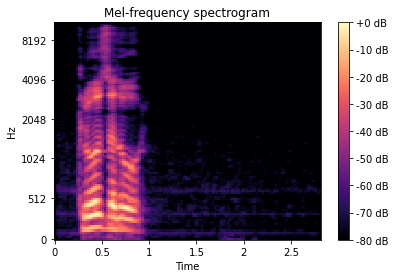

In [101]:
import librosa.display
import matplotlib.pyplot as plt

samples,sr=librosa.load("audio.wav")
S=librosa.feature.melspectrogram(samples,sr=sr)
fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')